In [2]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

C:\Users\Cheng Wen\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
del sp500["Dividends"]
del sp500["Stock Splits"]

<AxesSubplot:xlabel='Date'>

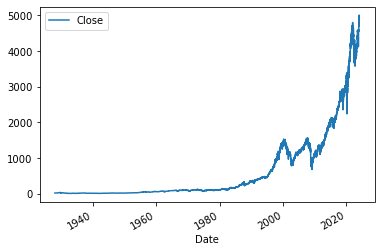

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [9]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,4942.810059,0
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,4954.229980,1
2024-02-06 00:00:00-05:00,4950.160156,4957.770020,4934.879883,4954.229980,4440880000,4995.060059,1


In [10]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,4942.810059,0
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,4954.229980,1
2024-02-06 00:00:00-05:00,4950.160156,4957.770020,4934.879883,4954.229980,4440880000,4995.060059,1


In [11]:
model = RandomForestClassifier(n_estimators=100, 
                               min_samples_split=100, 
                               random_state=42)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors =  ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=42)

In [19]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5

<AxesSubplot:xlabel='Date'>

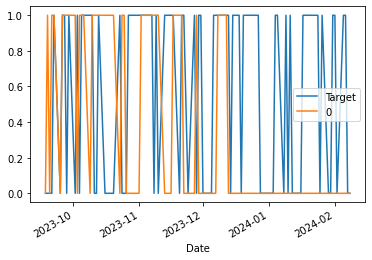

In [21]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [22]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [23]:
predictions = backtest(sp500, model, predictors)

In [27]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5307550644567219

In [28]:
predictions["Predictions"].value_counts()
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.534636
0    0.465364
Name: count, dtype: float64

In [32]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

<ipython-input-32-a10bd6326ff8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
<ipython-input-32-a10bd6326ff8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]


,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1997-11-26 00:00:00-05:00,950.820007,956.469971,950.820007,951.640015,487750000,955.400024,1,1.000431,2.0,0.997275,4.0,1.009111,33.0,1.113282,138.0,1.517046,563.0
1997-11-28 00:00:00-05:00,951.640015,959.130005,951.640015,955.400024,189070000,974.770020,1,1.001972,2.0,1.001967,4.0,1.012659,33.0,1.116599,139.0,1.521842,564.0
1997-12-01 00:00:00-05:00,955.400024,974.770020,955.400024,974.770020,590300000,971.679993,0,1.010035,2.0,1.019783,4.0,1.032356,34.0,1.138015,140.0,1.551433,564.0
1997-12-02 00:00:00-05:00,974.780029,976.200012,969.830017,971.679993,576120000,976.770020,1,0.998412,1.0,1.011259,4.0,1.028349,33.0,1.133204,140.0,1.545272,563.0
1997-12-03 00:00:00-05:00,971.679993,980.809998,966.159973,976.770020,624610000,973.099976,0,1.002612,1.0,1.011095,4.0,1.032949,33.0,1.137882,141.0,1.552105,564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01 00:00:00-05:00,4861.109863,4906.970215,4853.520020,4906.189941,4386090000,4958.609863,1,1.006208,1.0,1.001439,2.0,1.050393,39.0,1.126078,136.0,1.225211,527.0
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,4942.810059,0,1.005314,2.0,1.009351,3.0,1.059375,39.0,1.137251,137.0,1.237813,527.0
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,4954.229980,1,0.998404,1.0,1.005526,2.0,1.053882,38.0,1.132763,137.0,1.233386,527.0


In [33]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1997-11-26 00:00:00-05:00,950.820007,956.469971,950.820007,951.640015,487750000,955.400024,1,1.000431,2.0,0.997275,4.0,1.009111,33.0,1.113282,138.0,1.517046,563.0
1997-11-28 00:00:00-05:00,951.640015,959.130005,951.640015,955.400024,189070000,974.770020,1,1.001972,2.0,1.001967,4.0,1.012659,33.0,1.116599,139.0,1.521842,564.0
1997-12-01 00:00:00-05:00,955.400024,974.770020,955.400024,974.770020,590300000,971.679993,0,1.010035,2.0,1.019783,4.0,1.032356,34.0,1.138015,140.0,1.551433,564.0
1997-12-02 00:00:00-05:00,974.780029,976.200012,969.830017,971.679993,576120000,976.770020,1,0.998412,1.0,1.011259,4.0,1.028349,33.0,1.133204,140.0,1.545272,563.0
1997-12-03 00:00:00-05:00,971.679993,980.809998,966.159973,976.770020,624610000,973.099976,0,1.002612,1.0,1.011095,4.0,1.032949,33.0,1.137882,141.0,1.552105,564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01 00:00:00-05:00,4861.109863,4906.970215,4853.520020,4906.189941,4386090000,4958.609863,1,1.006208,1.0,1.001439,2.0,1.050393,39.0,1.126078,136.0,1.225211,527.0
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,4942.810059,0,1.005314,2.0,1.009351,3.0,1.059375,39.0,1.137251,137.0,1.237813,527.0
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,4954.229980,1,0.998404,1.0,1.005526,2.0,1.053882,38.0,1.132763,137.0,1.233386,527.0


In [34]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=42)

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [35]:
predictions["Predictions"].value_counts()

Predictions
0    3377
1    2715
Name: count, dtype: int64

In [36]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5307550644567219

In [9]:
a=np.random.randn(3,3)

b=np.random.randn(3,1)

c= a * b
c

array([[-1.72967419, -0.56841323, -0.37895552],
       [ 0.68407449,  2.80683717,  0.68975053],
       [ 0.54678425, -0.86914498, -0.90036059]])